## Movie Recommendation System Using Clustering

#### I don't know about you but I love movies maybe even more than TV shows. Movies have long been a cornerstone of entertainment, with people expressing expressing diverse preferences regarding genres, themes, and styles. To dive deeper into these preferences, I will be using a comprehensive movie dataset taken from https://www.kaggle.com/code/ekim01/explore-movie-ratings/report that features user ratings for films across various genres. I would also like to acknowledge F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872. As this dataset was adapted from their research. Key attributes of this dataset include movie names, genres, release years, and viewer ratings, providing a robust foundation for analysis. By leveraging clustering techniques, this project will explore patterns in user behavior and movie characteristics, aiming to answer intriguing questions such as: 
* Can we identify clusters of users with similar tastes? 
* How can these clusters be utilized to deliver personalized movie recommendations? 
* Are there specific groups of movies that are universally loved or disliked? 
#### Through these questions, this project seeks to uncover actionable insights into user preferences and enhance the movie recommendation experience.

### What Is Clustering? 
Clustering is an unsupervised machine learning technique used to group data points into clusters based on their similarity. This can help  patterns and structures within data to be realized without predefined labels. In this project, clustering will help analyze user ratings and movie characteristics to uncover groups of users with similar tastes and clusters of movies with comparable appeal. I plan to use K-Means Clustering, to partition data into a predefined number of clusters by minimizing the variance within each cluster. In order to identify distinct user groups based on their rating behaviors. This approach will enable personalized movie recommendations by associating users with clusters that reflect their preferences. Additionally, I will also use Agglomerative Hierarchical Clustering to explore relationships between users or movies at varying levels. Providing insights into nested or hierarchical patterns in the data. Together, these techniques will address key questions such as identifying user groups with shared preferences and uncovering clusters of universally liked or disliked movies.

In [4]:
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Lets start off by importing our datasets 

In [7]:
import pandas as pd

In [9]:
# reading the two csv file we are intrested in
df1 = pd.read_csv("ml-32m/movies.csv")
df2 = pd.read_csv("ml-32m/ratings.csv")

In [10]:
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
df2.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [15]:
# since the one field that both of these dat frames have in common is the movieId we can merge them based on that
combined_df = pd.merge(df1, df2, on='movieId', how='inner')

In [16]:
combined_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,2.5,1169265231
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,3.0,850085076
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.0,1027305751
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,974704488
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,20,5.0,1553184230


So here what the DF is doing is showing us, is how many times this movie has been rated by different users some of the users may have the same ID as well. The ratings range from 0.5-5. However, we can aggregate this data a bit further to get more concise results and see how many times a movie may have been rated all together. The only minor issue with this data seems to be that the genres for movies can be comrpised of others instead of being just one. We will see how to address or incorporate this as we move further!

In [18]:
aggregated_df = combined_df.groupby(['movieId', 'title', 'genres']).agg(
    avg_rating=('rating', 'mean'),
    num_ratings=('rating', 'count')
).reset_index()

In [21]:
aggregated_df.head()

,movieId,title,genres,avg_rating,num_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.897438,68997
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.275758,28904
2,3,Grumpier Old Men (1995),Comedy|Romance,3.139447,13134
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.845331,2806
4,5,Father of the Bride Part II (1995),Comedy,3.059602,13154


*This looks more concise and we can see how many times they movie was rated! Before we start any modeling let's just check to make sure there aren't any null values*

In [25]:
aggregated_df.isna().sum()

movieId        0
title          0
genres         0
avg_rating     0
num_ratings    0
dtype: int64

Perfect no null values we can continue! 

In [28]:
# lets go ahead and import some neccesary items for clustering and visualization
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

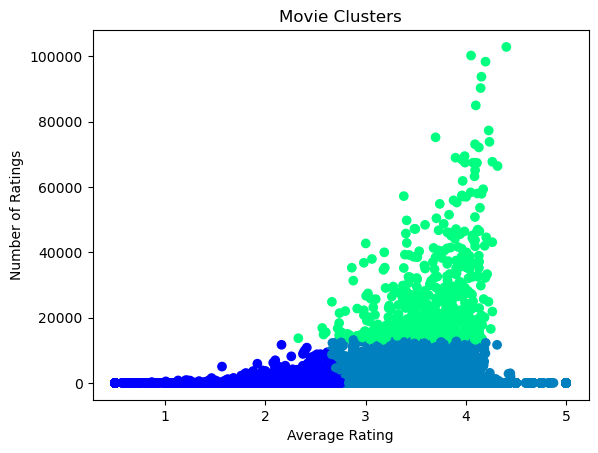

In [29]:
# select relevant features for clustering
features = aggregated_df[['avg_rating', 'num_ratings']]

#normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#apply k-eans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_df['movie_cluster'] = kmeans.fit_predict(scaled_features)

# visualize clusters
plt.scatter(aggregated_df['avg_rating'], aggregated_df['num_ratings'], c=aggregated_df['movie_cluster'], cmap='winter')
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.title('Movie Clusters')
plt.show()

Currently we have the clusters set to 3 we are going to repeat this code below to differentitate the results some more. In this plot the green represent poppular movies that have been rated by more users. The lighter blue suggests movies that might not have been as popularly reviewed by viewers but still highly rated. Whereas the dark blue suggests movie on the lower ends of both spectrums. The ovelap between these clusters could be due where movies share similar characteristics ex. moderately popular and rated movies.

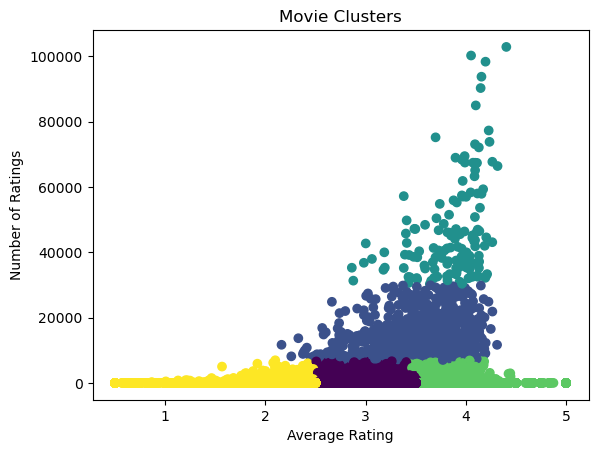

In [33]:
features = aggregated_df[['avg_rating', 'num_ratings']]

#normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#apply k-eans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
aggregated_df['movie_cluster'] = kmeans.fit_predict(scaled_features)

# visualize clusters
plt.scatter(aggregated_df['avg_rating'], aggregated_df['num_ratings'], c=aggregated_df['movie_cluster'], cmap='viridis_r')
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.title('Movie Clusters')
plt.show()

Here we can see some of same the observations made above but with the green and teal we observe what could be more niche films. These films may not have had a high presence of viewer ratings such as the teal but were highly rated by those who watched nonetheless. This suggests not all highly-rated movies are widely reviewed, and not all poorly-rated movies are ignored.

*One of the intresting things about this data-set is how some of these movies are singular genre, while others have multiple genres. Lets asses how unvisersally liked or dsilsiked movies are based on wether they have one genre or mutliple sub-genres.*

#### Lets start by taking a look at all genres first.

In [38]:
# Extract all unique genres
unique_genres = set()
aggregated_df["genres"].str.split("|").apply(unique_genres.update)

# Display unique genres
print("Unique Genres:", unique_genres)


Unique Genres: {'Horror', 'Crime', 'Documentary', 'Animation', 'Sci-Fi', 'Action', 'Musical', 'Romance', 'Children', 'War', 'Adventure', 'Drama', 'Fantasy', 'Western', 'Mystery', 'Film-Noir', 'Comedy', '(no genres listed)', 'IMAX', 'Thriller'}


From this we can observe all the different genres we are working with. There seems to be one issue though some of them do not have a genre lised ie. '(no genres listed)'. Lets take a look at the data once more to see how many movies have this result and decide what we should do.

In [41]:
no_genre_count = aggregated_df[aggregated_df["genres"] == "(no genres listed)"].shape[0]
print(f"Number of movies with no genres listed: {no_genre_count}")

Number of movies with no genres listed: 6555


In [43]:
count = aggregated_df["title"].shape[0]
print(f"All movies: {count}")

All movies: 84432


I used the title to get a count of how many movies we have total in this dataset. Based on our no genre count we observe that more than six thousand movies do not have a genre. For now I will keep the ones without a genre listed for further analysis.

In [46]:
aggregated_df['No genre listed'] = aggregated_df["genres"] == "(no genres listed)"

lets also make another column to take into consideration the mvies with mutliple sub-genres using one hot encoding

In [49]:
# one-hot encode the genres column
genre_encoded = aggregated_df["genres"].str.get_dummies(sep="|")

# merge the one-hot encoded columns back into the DataFrame
aggregated_df_encoded = pd.concat([aggregated_df, genre_encoded], axis=1)

# add a new feature for the number of genres
aggregated_df_encoded["num_genres"] = aggregated_df["genres"].str.count(r"\|") + 1

aggregated_df_encoded.head()

,movieId,title,genres,avg_rating,num_ratings,movie_cluster,No genre listed,(no genres listed),Action,Adventure,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.897438,68997,2,False,0,0,1,...,0,0,0,0,0,0,0,0,0,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.275758,28904,3,False,0,0,1,...,0,0,0,0,0,0,0,0,0,3
2,3,Grumpier Old Men (1995),Comedy|Romance,3.139447,13134,3,False,0,0,0,...,0,0,0,0,1,0,0,0,0,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.845331,2806,4,False,0,0,0,...,0,0,0,0,1,0,0,0,0,3
4,5,Father of the Bride Part II (1995),Comedy,3.059602,13154,3,False,0,0,0,...,0,0,0,0,0,0,0,0,0,1


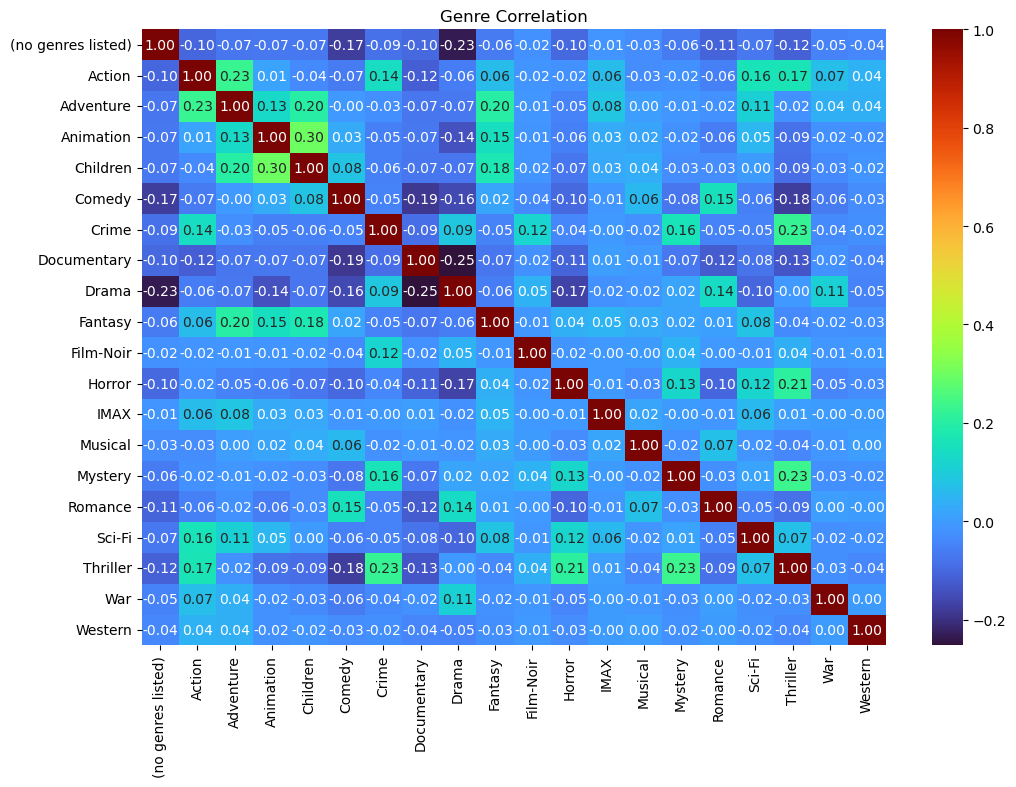

In [51]:
import seaborn as sns

#compute the correlation matrix of the one hot encoded genres
genre_corr = genre_encoded.corr()

# plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_corr, annot=True, cmap="turbo", fmt=".2f")
plt.title("Genre Correlation")
plt.show()

Through this heat map we can observe the coorelations between the genres for example. On the x-axis we see action movies coorelate with thriller, sci-fi and adventure. For companies who could be looking to make movies or get ideas on what genres coorealte with one another this could be a very useful tool! Furthermore this present even more insight on how genres can coorealte because as someone who likes thrillers theres certain aspects I look for when choosing what movies to watch!

Although I did want to make a recommender system there is not a feature in my data-set that gives say a summary of the movie. Which is something I wanted to use in order to achieve this functionality. One of the intresting things we still have is how some of these movies have different sub genres. We still have room to expand on this by performing clustering to group movies with similar genre compositions. This could uncover genre patterns or similarities between movies. That could be further broken down for someone who is tryig to get an understanding on how these differetn genres could play into making a universaly liked movie/s.

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

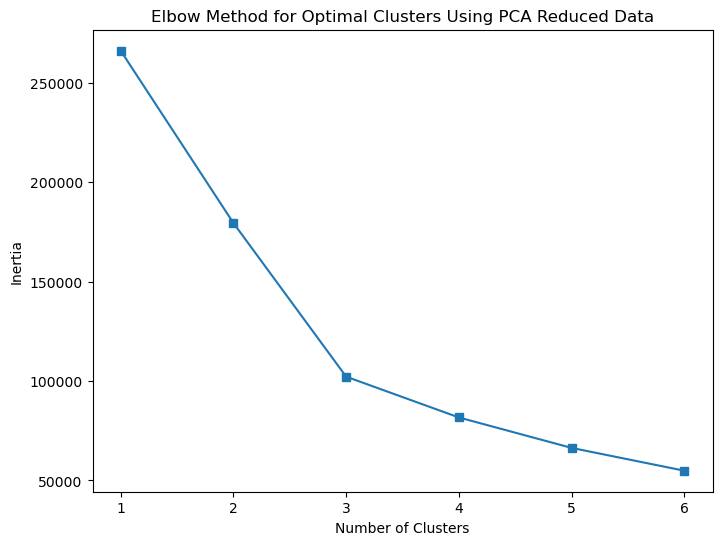

In [71]:
#select the relevant columns for clustering 
X = aggregated_df_encoded[['avg_rating', 'num_ratings'] + ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].values  # Adjust genre columns as needed

#standardizing the features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# reduce dimensionality with PCA for better visualization and clustering
pca = PCA(n_components=2)  # Reduce to 2 components for easier visualization
X_pca = pca.fit_transform(scaled_X)

# elbow method to find the optimal number of clusters
inertia = []
range_k = range(1, 7)  #trying values from 1 to 7 clusters to make 6 clusters

# KMeans for each k
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # Fit the model on the reduced data (2D space)
    inertia.append(kmeans.inertia_)

#plotting  elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range_k, inertia, marker='s')
plt.title("Elbow Method for Optimal Clusters Using PCA Reduced Data")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


### Cool graph bro, but what does it even mean. 
The elbow graph suggests that the optimal number of clusters for the dataset is around three, as this is where the rate of decrease in inertia significantly slows, forming an "elbow" in the curve. This indicates that dividing the data into three clusters strikes a balance between minimizing within-cluster variance and avoiding unnecessary complexity. Beyond three clusters, the reduction in inertia becomes less significant, suggesting diminishing returns and potential over-segmentation if more clusters are added. Since the graph is based on PCA-reduced data, the clustering reflects broad patterns in the dataset, making it suitable for high-level grouping. Overall, clustering into three groups likely provides the most meaningful and interpretable segmentation of the data. When analyzing the the x-axis represents the number of clusters (k) chosen for the KMeans algorithm, ranging from 2 to 10. y-axis represents inertia, which is the sum of squared distances between each data point and the centroid. High inertia values mean the clusters are spread out, with less tight groupings, while lower inertia indicates more compact, well-defined clusters. As the number of clusters increases, inertia decreases because data points are assigned to smaller, closer clusters.

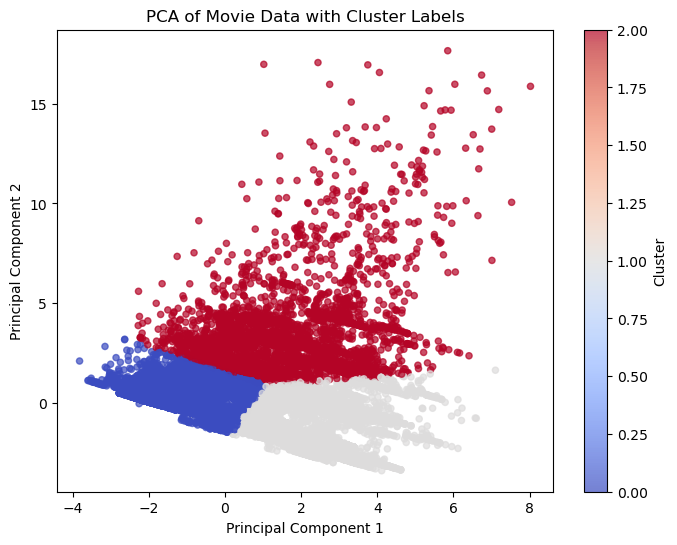

In [76]:
# visualize the PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# plot with color-coded clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='coolwarm', s=20, alpha=0.7)
plt.title("PCA of Movie Data with Cluster Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

This graph visualizes the results of applying K-Means clustering with 3 clusters to the PCA-reduced movie data. Each point represents a movie, and the colors indicate the cluster to which each movie belongs, based on its similarity in genre composition and ratings. By reducing the data to two principal components ie. Principal Component 1 and 2. We observe the relative grouping and separation of movies in a simple 2D space. This clustering analysis helps us identify patterns or groupings in movie genres, revealing how certain genre combinations or characteristics tend to cluster together. For example, one cluster might represent action films, another romantic comedies, and another genre hybrids. Showing this graph provides a clear and intuitive way to interpret the clusters, allowing us to analyze how movies with similar genres or ratings naturally group and potentially uncover insights into what makes certain combinations more popular or distinct.

## Conclusion 
This was a very interesting project and possibly the one where I had to adapt my thoughts more compared to the rest of the projects. This was partially my fault because I was not able to come up with a recommender system as I did not fully examine the dataset. Nonetheless, I tried exploring certain features and expanding on them as well as I could. Also, throughout the last couple of projects, my datasets have had many features to work with. However, when I initially merged the data frames for this project, I only had about 3–4 features to work with, and I created the rest as I went along. This really gave me more analytical insight into how to think inquisitively when things did not work out and how to expand on aspects that I may not have initially considered. Alongside this I really got to learn more in-depth about clustering my favorite graph for this project would be the heat map as it showed how the different genres coorelated with one another. I find this could be a very important factor for movie or even TV studios when trying to figure what aspects or sub-genres a certain p have!